Authur: Elizabeth Luong

Date: 26 February 2025

## Q1 


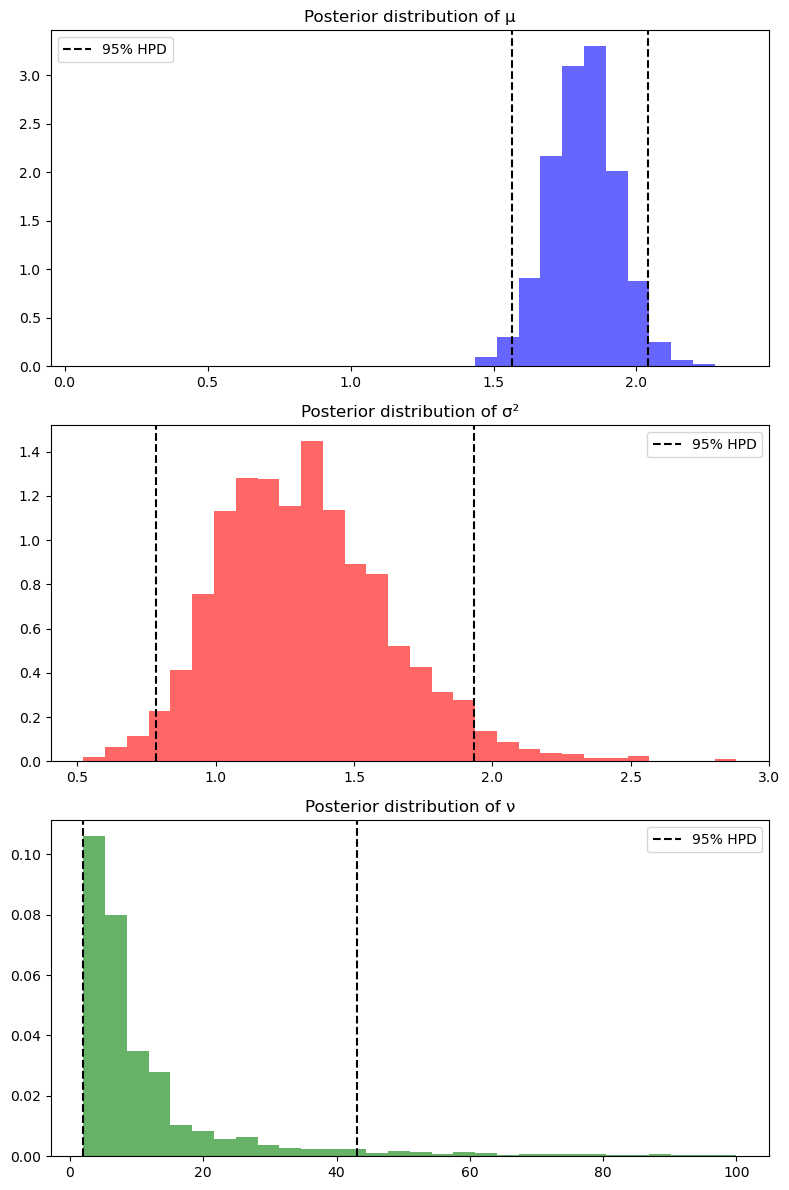

95% HPD interval for μ: (1.5631797813291053, 2.0385922706267916)
95% HPD interval for σ²: (0.7855754424604454, 1.9334336905320888)
95% HPD interval for ν: (2, 43)


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

np.random.seed(365)

def log_posterior(mu, sigma2, nu, x):
    n = len(x)
    log_prior_mu = stats.norm.logpdf(mu, loc=0, scale=np.sqrt(1))  # Normal prior
    log_prior_sigma2 = np.log(2 / np.pi) - 0.5 * sigma2 ** 2  # Half-normal prior
    log_prior_nu = -np.log(100) if 1 <= nu <= 100 else -np.inf  # Discrete uniform

    log_likelihood = np.sum(stats.t.logpdf(x, df=nu, loc=mu, scale=np.sqrt(sigma2)))

    return log_likelihood + log_prior_mu + log_prior_sigma2 + log_prior_nu

def metropolis_within_gibbs(x, iterations=5000, mu_init=0, sigma2_init=1, nu_init=10):
    n = len(x)
    mu_samples = np.zeros(iterations)
    sigma2_samples = np.zeros(iterations)
    nu_samples = np.zeros(iterations, dtype=int)

    mu_current = mu_init
    sigma2_current = sigma2_init
    nu_current = nu_init

    for i in range(iterations):
        mu_proposal = np.random.normal(mu_current, 0.5)
        log_alpha_mu = log_posterior(mu_proposal, sigma2_current, nu_current, x) - \
                       log_posterior(mu_current, sigma2_current, nu_current, x)
        if np.log(np.random.uniform()) < log_alpha_mu:
            mu_current = mu_proposal
            
            
        sigma2_proposal = np.abs(np.random.normal(sigma2_current, 0.5))  # Ensure positivity
        log_alpha_sigma2 = log_posterior(mu_current, sigma2_proposal, nu_current, x) - \
                           log_posterior(mu_current, sigma2_current, nu_current, x)
        if np.log(np.random.uniform()) < log_alpha_sigma2:
            sigma2_current = sigma2_proposal

        nu_proposal = np.random.randint(1, 101)
        log_alpha_nu = log_posterior(mu_current, sigma2_current, nu_proposal, x) - \
                       log_posterior(mu_current, sigma2_current, nu_current, x)
        if np.log(np.random.uniform()) < log_alpha_nu:
            nu_current = nu_proposal

        mu_samples[i] = mu_current
        sigma2_samples[i] = sigma2_current
        nu_samples[i] = nu_current

    return mu_samples, sigma2_samples, nu_samples

np.random.seed(42)
n = 100
true_mu = 2
true_sigma2 = 1.5
true_nu = 10
x = stats.t.rvs(df=true_nu, loc=true_mu, scale=np.sqrt(true_sigma2), size=n)

mu_samples, sigma2_samples, nu_samples = metropolis_within_gibbs(x, iterations=5000)

def hpd_interval(samples, alpha=0.05):
    sorted_samples = np.sort(samples)
    n = len(sorted_samples)
    interval_idx = int(np.floor(n * (1 - alpha)))
    intervals = [sorted_samples[i:i + interval_idx] for i in range(n - interval_idx)]
    hpd = min(intervals, key=lambda x: x[-1] - x[0])
    return hpd[0], hpd[-1]

mu_hpd = hpd_interval(mu_samples)
sigma2_hpd = hpd_interval(sigma2_samples)
nu_hpd = hpd_interval(nu_samples)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].hist(mu_samples, bins=30, density=True, alpha=0.6, color='b')
axs[0].axvline(mu_hpd[0], color='k', linestyle='dashed', label="95% HPD")
axs[0].axvline(mu_hpd[1], color='k', linestyle='dashed')
axs[0].set_title("Posterior distribution of \u03BC")
axs[0].legend()

axs[1].hist(sigma2_samples, bins=30, density=True, alpha=0.6, color='r')
axs[1].axvline(sigma2_hpd[0], color='k', linestyle='dashed', label="95% HPD")
axs[1].axvline(sigma2_hpd[1], color='k', linestyle='dashed')
axs[1].set_title("Posterior distribution of \u03C3²")
axs[1].legend()

axs[2].hist(nu_samples, bins=30, density=True, alpha=0.6, color='g')
axs[2].axvline(nu_hpd[0], color='k', linestyle='dashed', label="95% HPD")
axs[2].axvline(nu_hpd[1], color='k', linestyle='dashed')
axs[2].set_title("Posterior distribution of \u03BD")
axs[2].legend()

plt.tight_layout()
plt.show()

print(f"95% HPD interval for \u03BC: {mu_hpd}")
print(f"95% HPD interval for \u03C3²: {sigma2_hpd}")
print(f"95% HPD interval for \u03BD: {nu_hpd}")

## Q2


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


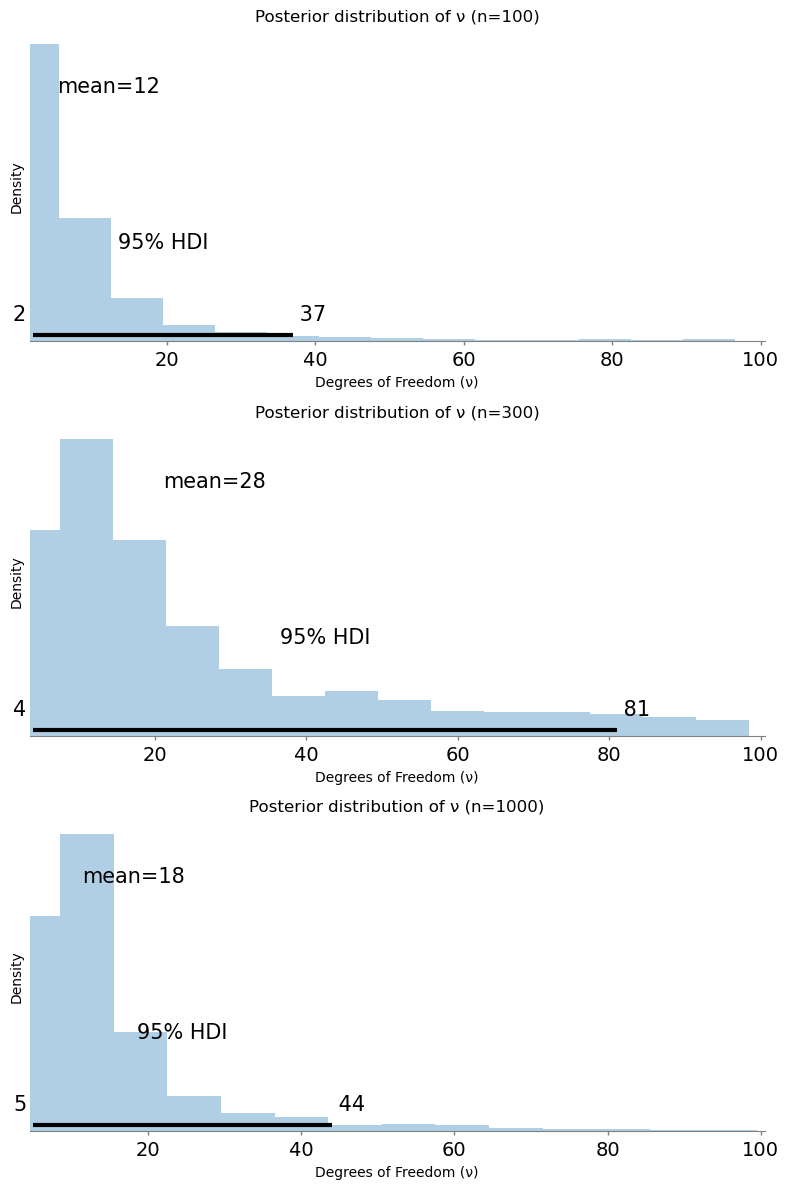


Summary for sample size 100:
  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
12.102 13.789     2.0     33.0      1.011    0.723     302.0     210.0   1.01

Summary for sample size 300:
  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
27.891 22.545     4.0     77.0      1.231    0.871     308.0     623.0   1.02

Summary for sample size 1000:
  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
18.127 13.065     6.0     41.0      0.981     0.74     297.0     214.0   1.01


In [2]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

np.random.seed(365)

def bayesian_inference_on_v(sample_size, true_mu=2, true_sigma2=1.5, true_nu=10, draws=3000):
    np.random.seed(42)
    x = np.random.standard_t(df=true_nu, size=sample_size) * np.sqrt(true_sigma2) + true_mu

    with pm.Model() as model:
        mu = pm.Normal("mu", mu=0, sigma=1)
        sigma = pm.HalfNormal("sigma", sigma=1)
        nu = pm.DiscreteUniform("nu", lower=1, upper=100)

        likelihood = pm.StudentT("obs", nu=nu, mu=mu, sigma=sigma, observed=x)

        trace = pm.sample(draws, tune=1000, return_inferencedata=True, cores=2)

    return trace

sample_sizes = [100, 300, 1000]
inference_results = {}
for n in sample_sizes:
    inference_results[n] = bayesian_inference_on_v(n)

fig, axes = plt.subplots(3, 1, figsize=(8, 12))
for idx, n in enumerate(sample_sizes):
    az.plot_posterior(inference_results[n].posterior["nu"], ax=axes[idx], hdi_prob=0.95)
    axes[idx].set_title(f"Posterior distribution of \u03BD (n={n})")
    axes[idx].set_xlabel("Degrees of Freedom (\u03BD)")
    axes[idx].set_ylabel("Density")
plt.tight_layout()
plt.show()

for n in sample_sizes:
    summary = az.summary(inference_results[n], var_names=["nu"], hdi_prob=0.94)

    summary = summary.rename(columns={
        "hdi_2.5%": "hdi_3%",
        "hdi_97.5%": "hdi_97%"
    })

    summary = summary[["mean", "sd", "hdi_3%", "hdi_97%", "mcse_mean", "mcse_sd", "ess_bulk", "ess_tail", "r_hat"]]

    print(f"\nSummary for sample size {n}:")
    print(summary.to_string(index=False))  

## Q3

The given integral simplifies to a Student’s t-distribution when integrating out the uncertainty in $\tau_i$. In a normal model where the variance is unknown, the posterior predictive distribution follows a t-distribution. The characteristic heavy tails of the t-distribution naturally emerge due to the additional variability introduced by the uncertainty in the variance estimation.

This behavior aligns with Bayesian posterior predictive inference because, in Bayesian analysis, predictions account for parameter uncertainty by integrating over possible parameter values. Just as the integral here marginalizes over $\tau_i$, Bayesian inference incorporates uncertainty when making new predictions, ensuring a more robust representation of possible outcomes.